# GRIP @ The Sparks Foundation


## Task 1: Prediction using Supervised Machine Learning

### In this regression task I tried to predict of marks that a students is expected to score based upon the  numbers of hours they studied.

### This is a simple linear regression task as it involves just two variables.

### Technical Stack : Sikit Learn, Numpy Array, Pandas, Matplotlib

## Presented by : Rajalingam G



In [5]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
#import dataset

data=pd.read_csv("D:\SPARKS FOUNDATION\student_scores - student_scores.xls")

In [7]:
# view of first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# view of last 5 rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
# To see the statistics of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#full summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Explotary data analysis(EDA)

In [11]:
#import libraries for plotting graphs
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

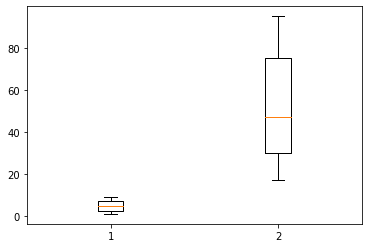

In [12]:
#Boxplot
plt.boxplot(data)
plt.show

<AxesSubplot:>

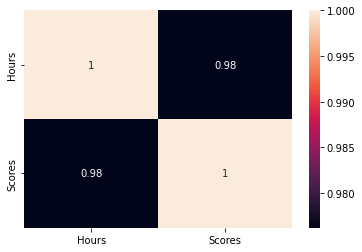

In [13]:
#import heatmap
sns.heatmap(data.corr(), annot=True)
# the darker shades of the chart represent higher values than the lighter shade

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Visualizing Data

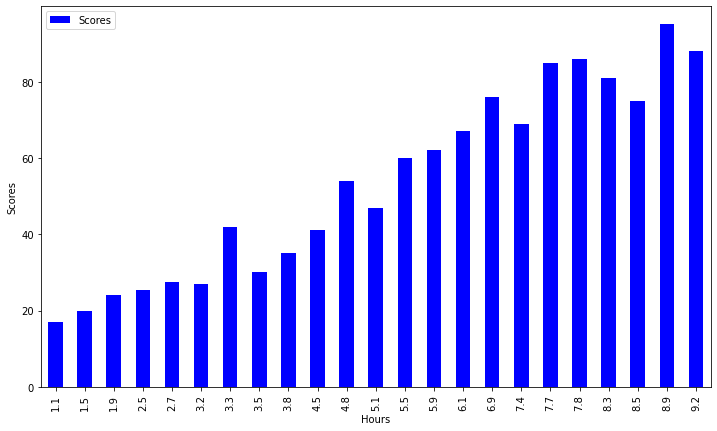

In [15]:
study_Hours= data.pivot_table(index="Hours",values="Scores",aggfunc=np.median)

study_Hours.plot(kind='bar' ,color='blue',figsize=(12,7))
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


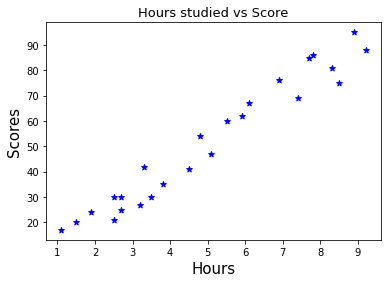

In [16]:
#plotting scatter plot

plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score' ,fontsize=13)
plt.scatter(data.Hours,data.Scores,color='blue',marker='*')
plt.show()

### If the number of study hours increase corresponding scores also increases
### We can see clearly by using barchart and Scatterplot

In [17]:
# Splitting our target variable
X=data.iloc[:,:1].values
Y=data.iloc[:,1:].values

## Splitting train and test data

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)

In [19]:
#Review of our train and test data
print("X_Train_Shape:",x_train.shape, "X_Test_Shape:",x_test.shape)
print("Y_Train_Shape:",y_train.shape, "Y_Test_Shape:",y_test.shape)

X_Train_Shape: (17, 1) X_Test_Shape: (8, 1)
Y_Train_Shape: (17, 1) Y_Test_Shape: (8, 1)


## Linear Regression Algorithm

In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [21]:
regressor.fit(x_train, y_train)

LinearRegression()

## Visualization of train data

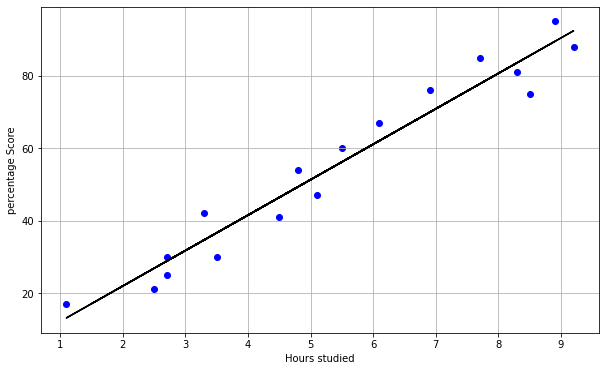

In [22]:
#Visualizion
line = regressor.coef_*X + regressor.intercept_

#plotting training data
plt.rcParams['figure.figsize'] = [10,6]
plt.scatter(x_train, y_train, color='b')
plt.plot(X, line, color='black');
plt.xlabel('Hours studied')
plt.ylabel('percentage Score')
plt.grid()
plt.show()

## Visualization of test data 

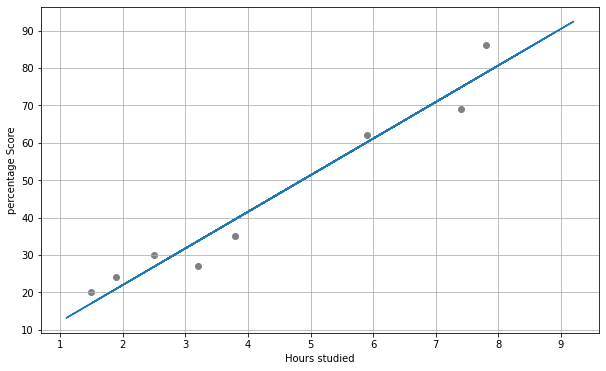

In [23]:
#plotting test data
plt.rcParams['figure.figsize'] = [10,6]
plt.scatter(x_test, y_test, color='grey')
plt.plot(X, line);
plt.xlabel('Hours studied')
plt.ylabel('percentage Score')
plt.grid()
plt.show()

In [24]:
#predicting scores
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [25]:
#actual vs predicted

y_test



array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24],
       [86]], dtype=int64)

In [26]:
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [27]:
#actual vs predicted
comp = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24], [86]]","[[17.05366541246545], [33.69422877993883], [74..."


In [28]:
#testing own data

hours = 9.25
own_pred = regressor.predict([[hours]])
print('The predicted score if a person studies for',hours, 'hours is', own_pred[0])

The predicted score if a person studies for 9.25 hours is [92.91505723]


In [29]:
#Evaluating the model

from sklearn import metrics
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652
